In [39]:
#그래프 환경설정
options(warn = -1)
options(repr.plot.width = 15, repr.plot.height=9)
Sys.setlocale(category = 'LC_ALL' , locale = 'ko_KR.UTF-8') ## 한글보이기

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [2]:
#데이터 정렬
library(dplyr)

library(plotrix)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
baby <- read.csv("../Data/R_Baby_Names_1880-2014.csv")
head(baby)

,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<chr>,<int>
1,Mary,F,7065,01/01/1880 12:00:00 AM,1
2,Anna,F,2604,01/01/1880 12:00:00 AM,2
3,Emma,F,2003,01/01/1880 12:00:00 AM,3
4,Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
5,Minnie,F,1746,01/01/1880 12:00:00 AM,5
6,Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [4]:
tail(baby)

,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<chr>,<int>
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


In [5]:
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : chr  "F" "F" "F" "F" ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [6]:
#baby의 Year부분 정리하기
baby$Year <- as.numeric(substring(baby$Year, 7, 10))

head(baby)

,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<dbl>,<int>
1,Mary,F,7065,1880,1
2,Anna,F,2604,1880,2
3,Emma,F,2003,1880,3
4,Elizabeth,F,1939,1880,4
5,Minnie,F,1746,1880,5
6,Margaret,F,1578,1880,6


In [7]:
write.csv(baby, "../Data/baby.csv", row.names=F)  #특정 부분만 추려서 저장하면 용량이 줄어듦

In [8]:
#baby에서 여자아이만 Female이라는 데이터셋을 만들고 row수 구하기
female <- subset(baby, Gender == "F")
nrow(female)

[1] 1081660

In [9]:
# 여자 아이 이름 수 계산
length(unique(female$Name))


[1] 64911

In [10]:
# 남자 아이 이름 수 계산
male <- subset(baby, Gender == "M")
nrow(male)

length(unique(male$Name))

[1] 743728

[1] 39199

In [11]:
# 가장 많이 사용된 여자아이 이름 Top 10구하기
female_nameNo <- arrange(aggregate(Count ~ Name, female, sum), desc(Count))[1:10,]
dfemale_nameNo

,Name,Count
,<chr>,<int>
1,Mary,4115282
2,Elizabeth,1601128
3,Patricia,1570567
4,Jennifer,1462742
5,Linda,1450843
6,Barbara,1432944
7,Margaret,1240006
8,Susan,1120469
9,Dorothy,1105680


In [13]:
#Female Year별 Count
femaleCount <- aggregate(Count ~ Year, female, sum)
head(femaleCount)

#Male Year별 Count
maleCount <- aggregate(Count ~ Year, male, sum)
head(maleCount)


#     price, 
#     type="l")

,Year,Count
,<dbl>,<int>
1,1880,90993
2,1881,91954
3,1882,107850
4,1883,112321
5,1884,129022
6,1885,133055


,Year,Count
,<dbl>,<int>
1,1880,110491
2,1881,100745
3,1882,113683
4,1883,104629
5,1884,114445
6,1885,107800


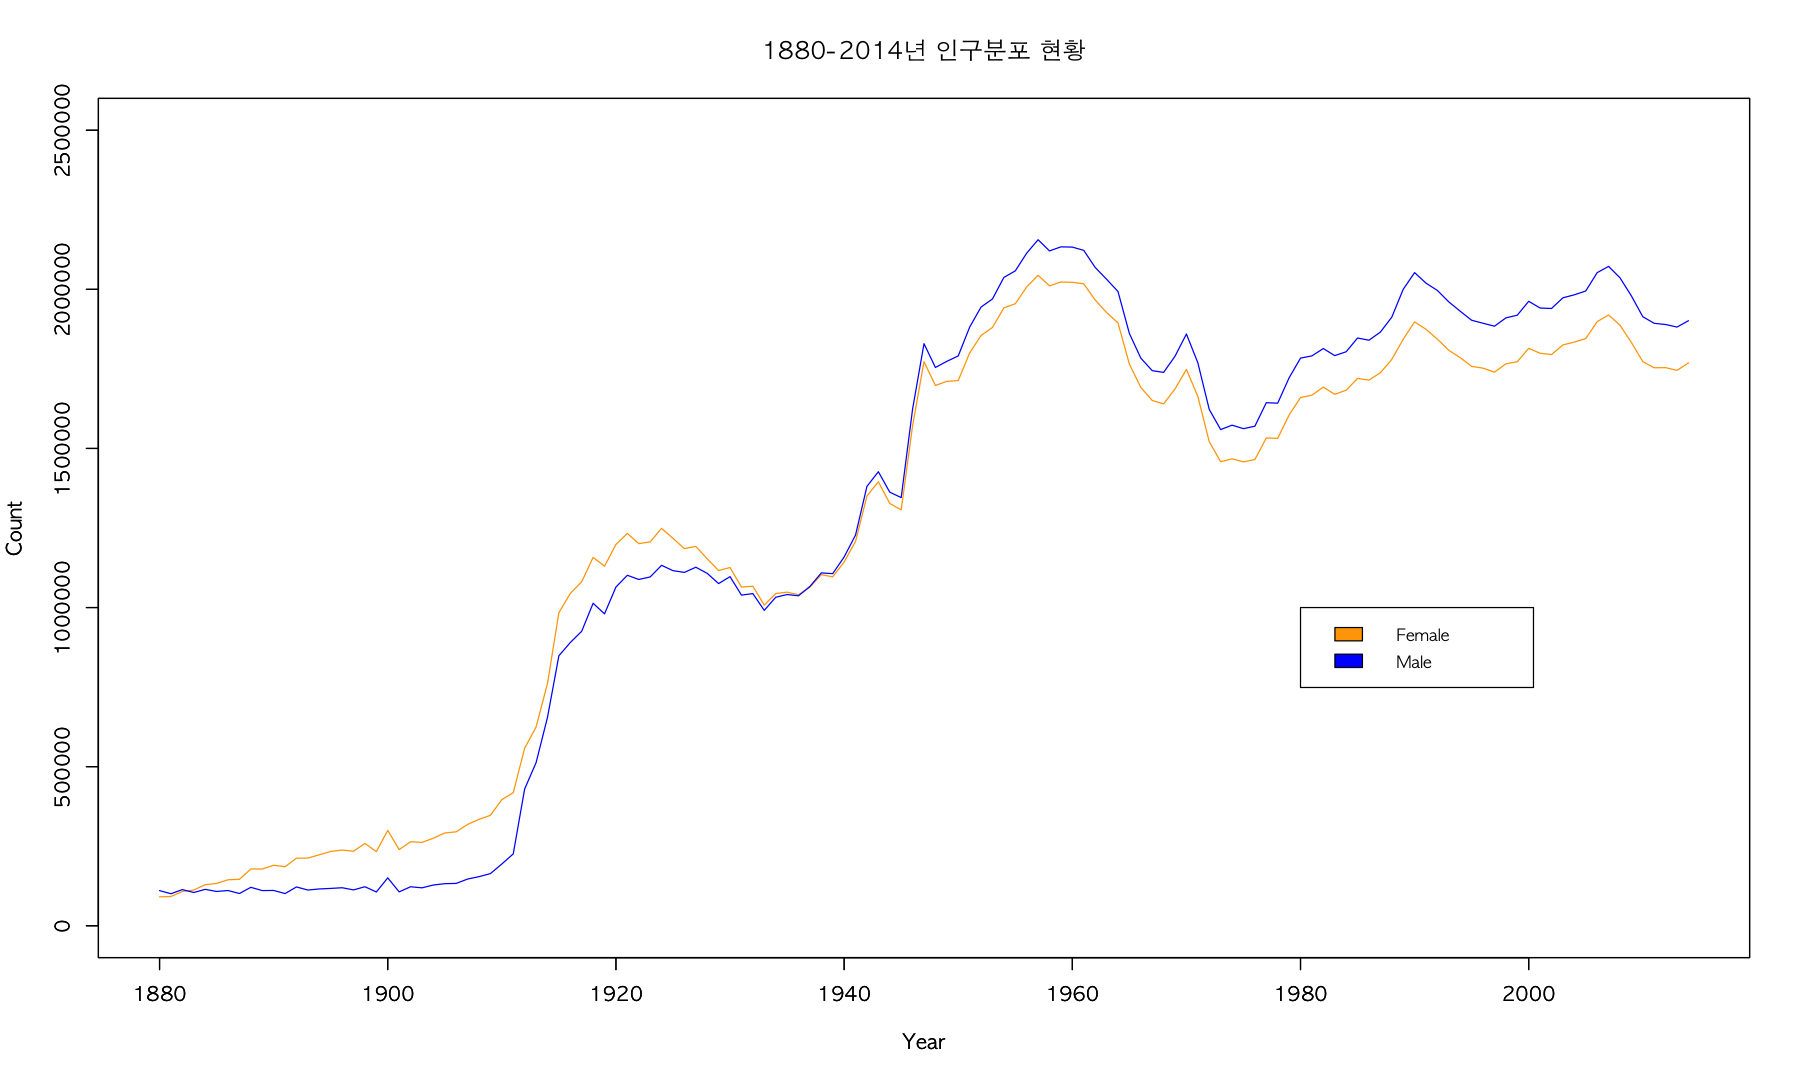

In [41]:
par(bg = "white")
par(family = "AppleGothic")
plot(
    femaleCount, 
    type="l",
    col="orange",
    ylim = c(0,2500000),
    main = "1880-2014년 인구분포 현황"
)

par(new = T)

plot(
    maleCount, 
    type="l",
    col="blue",
    ylim = c(0,2500000)
)

legend(
    1980,   #(x축 5번째인 위치)
    1000000, #(y축의 600000번 위치)
    c("Female","Male"),
    c(rownames(baby$Count)),
    fill = c("orange","blue"),
    cex = 0.8, #글자크기
    )
